In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import time

In [2]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By

In [3]:
from bs4 import BeautifulSoup
from selenium import webdriver

url = "https://bananarepublic.gap.com/browse/category.do?cid=5389&nav=meganav%3AMen%3AMen%27s%20Clothing%3ADenim"
driver = webdriver.Chrome()
driver.get(url)
driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")


In [4]:
html = driver.page_source
soup = BeautifulSoup(html)

In [5]:
res = soup.find_all('div',attrs={'class':'cat_product-image category-page-1ka9lu7'})

In [12]:
for i in range(10):
    print(res[i].findChildren("a")[0]['href'].split('?pid=')[1].split('&')[0])

569991012
733586012
733586022
320601002
569991042
733586002
569991002
569991032
389571002
536787002


## get star ratings

In [13]:
productid = []
star_rating = []
review_header = []
review_desc = []

d = {}

for i in range(len(res)):
    temp_review = []
    temp_desc = []
    temp_star = []
    temp_pid = []
    
    print(res[i].findChildren("a")[0]['href'].split('?pid=')[1].split('&')[0])
    if i <10:
        print(res[i].findChildren("a")[0]['href'].split('?pid=')[1].split('&')[0])

        product_url = 'https://bananarepublic.gap.com/browse/product.do?pid={}&cid=1021453&pcid=5389&vid=1&nav=meganav%3AMen%3AMen%27s%20Clothing%3ADenim#pdp-page-content'.format(pid)

        driver = webdriver.Chrome()
        driver.get(product_url)
        driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")
        
        time.sleep(15)
        
        button = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, '.d1a171')))

        button.click()
        
        html = driver.page_source
        soup = BeautifulSoup(html)

#         star = soup.find_all('div',attrs={'class':'pr-snippet-rating-decimal'})
#         if len(star)>0:
#             for r in range(len(star)):
#                 temp_star.append(star[r].text)    
            
            
        
#         review = soup.find_all('h2',attrs={'class':'pr-rd-review-headline'})
#         if len(review)>0:
#             for r in range(len(review)):
#                 temp_review.append(review[r].text)
#                 temp_pid.append(pid)
            
#         desc = soup.find_all('p',attrs={'class':'pr-rd-description-text'})    
#         if len(desc)>0:
#             for r in range(len(desc)):
#                 temp_desc.append(desc[r].text)

                
#         productid.append(temp_pid)
#         star_rating.append(temp_star)
#         review_header.append(temp_review)
#         review_desc.append(temp_desc)

#         driver.close()
#         driver.quit()
#     else:
#         break


569991012
569991012


NameError: name 'pid' is not defined

In [24]:
product_url = 'https://bananarepublic.gap.com/browse/product.do?pid=569991012&cid=1021453&pcid=5389&vid=1&nav=meganav%3AMen%3AMen%27s%20Clothing%3ADenim#pdp-page-content'

driver = webdriver.Chrome()
driver.get(product_url)
driver.execute_script("window.scrollTo(0, 1500);")

time.sleep(15)

button = WebDriverWait(driver, 10).until(EC.presence_of_element_located((By.CSS_SELECTOR, '.product-information-tabs-panel--3')))

button.click()

html = driver.page_source
soup = BeautifulSoup(html)

NameError: name 'WebDriverWait' is not defined

In [14]:
soup

<html class="js-focus-visible" data-js-focus-visible="" lang="en-US"><head data-optly-3c487b03-99b8-4743-a123-df34c042fcd1="" data-optly-66445a14663546c28cc3fcfc0b823a7f="" data-optly-a4a01b48a5ff4800addaff6567c6678a="" data-optly-dae3fef020194b728ebadb1f83e0b73c=""><script async="" src="https://rules.quantcount.com/rules-p-VQR3H3srruX-H.js"></script><script async="" charset="utf-8" id="utag_1238" src="https://c.amazon-adsystem.com/aat/amzn.js" type="text/javascript"></script><script async="" charset="utf-8" id="utag_1130" src="https://secure.quantserve.com/quant.js" type="text/javascript"></script><script async="" crossorigin="anonymous" src="https://edge.fullstory.com/s/fs.js"></script><script async="" charset="utf-8" id="utag_1194" src="https://www.googletagmanager.com/gtag/js?id=AW-1069567947" type="text/javascript"></script><script async="" charset="utf-8" data-document-language="true" data-domain-script="7ef24dc0-37da-4bab-8b07-e0958c5b096f" src="https://cdn.cookielaw.org/consent

In [170]:
productid = [ids for ids in productid if ids]
review_header = [review for review in review_header if review]
review_desc = [review for review in review_desc if review]


# Create DataFrames for both product_id and star_rating
df_product_id = pd.DataFrame({'product_id': [item for sublist in productid for item in sublist]})
df_review_header = pd.DataFrame({'review_header': [item for sublist in review_header for item in sublist]})
df_review_desc = pd.DataFrame({'review_desc': [item for sublist in review_desc for item in sublist]})

# Concatenate the DataFrames horizontally
result_df = pd.concat([df_product_id, df_review_header,df_review_desc], axis=1)

In [171]:
result_df

,product_id,review_header,review_desc
0,455585002,good fit,"fit was great, wish they did the distressing b..."
1,455585002,Number one brand in the world,Waaoowww amazing product looks good on me whe...
2,455585002,Great fit with style,"Great fit and quality, if you are looking for ..."
3,455585002,jeans sometimes come with holes,good jeans but 1 point off for the scuffs in t...
4,455585002,College approved,My college son loves the baggy fit of these je...
...,...,...,...
68,819664002,Love gap,I like it
69,819664002,Not skinny fit as other Color Skinny Fit Jeans,"Not skinny fit, more slim fit; sent back for a..."
70,819664002,Great,Great
71,819664002,Jeans that fit!,Great fit!


In [140]:
# pip install textblob

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 636.8/636.8 kB 1.4 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [142]:
# pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.8/222.8 kB 3.5 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for wordcloud: filename=wordcloud-1.9.2-cp311-cp311-macosx_11_0_arm64.whl size=151973 sha256=4c70f5cde919ff9a11c43567335d0932ce5a2ad5e2d0c270090d657da5fcd3d9
  Stored in directory: /Users/akanksha/Library/Caches/pip/wheels/3f/c6/5a/89824e1846baaa6d6d54b3a7b1e7deecc9ae6e7ed30a1c8b0e
Successfully built wordcloud
Note: you may need to restart the kernel to use updated packages.


In [172]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [173]:
nltk.download("vader_lexicon") # Replace with your actual data source
sid = SentimentIntensityAnalyzer()

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/akanksha/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [174]:
result_df

,product_id,review_header,review_desc
0,455585002,good fit,"fit was great, wish they did the distressing b..."
1,455585002,Number one brand in the world,Waaoowww amazing product looks good on me whe...
2,455585002,Great fit with style,"Great fit and quality, if you are looking for ..."
3,455585002,jeans sometimes come with holes,good jeans but 1 point off for the scuffs in t...
4,455585002,College approved,My college son loves the baggy fit of these je...
...,...,...,...
68,819664002,Love gap,I like it
69,819664002,Not skinny fit as other Color Skinny Fit Jeans,"Not skinny fit, more slim fit; sent back for a..."
70,819664002,Great,Great
71,819664002,Jeans that fit!,Great fit!


In [175]:
def categorize_sentiment(score):
    if score >= 0.05:
        return "positive"
    elif score <= -0.05:
        return "negative"
    else:
        return "neutral"

result_df["sentiment"] = result_df["review_desc"].apply(lambda x: sid.polarity_scores(x)["compound"])
result_df["sentiment_category"] = result_df["sentiment"].apply(categorize_sentiment)

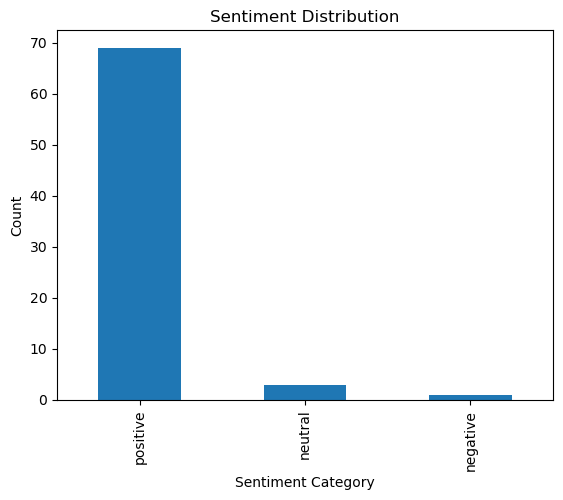

In [176]:
sentiment_counts = result_df["sentiment_category"].value_counts()
sentiment_counts.plot(kind="bar", title="Sentiment Distribution")
plt.xlabel("Sentiment Category")
plt.ylabel("Count")
plt.show()

In [177]:
result_df

,product_id,review_header,review_desc,sentiment,sentiment_category
0,455585002,good fit,"fit was great, wish they did the distressing b...",0.8591,positive
1,455585002,Number one brand in the world,Waaoowww amazing product looks good on me whe...,0.7717,positive
2,455585002,Great fit with style,"Great fit and quality, if you are looking for ...",0.8885,positive
3,455585002,jeans sometimes come with holes,good jeans but 1 point off for the scuffs in t...,0.2382,positive
4,455585002,College approved,My college son loves the baggy fit of these je...,0.7351,positive
...,...,...,...,...,...
68,819664002,Love gap,I like it,0.3612,positive
69,819664002,Not skinny fit as other Color Skinny Fit Jeans,"Not skinny fit, more slim fit; sent back for a...",-0.7536,negative
70,819664002,Great,Great,0.6249,positive
71,819664002,Jeans that fit!,Great fit!,0.7840,positive


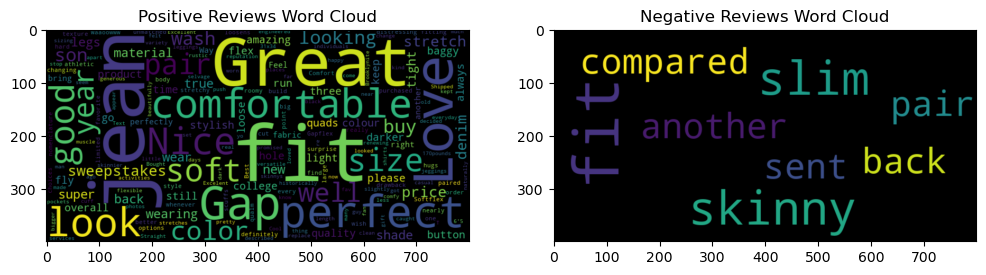

In [178]:
positive_reviews = " ".join(result_df[result_df["sentiment_category"] == "positive"]["review_desc"])
negative_reviews = " ".join(result_df[result_df["sentiment_category"] == "negative"]["review_desc"])

wordcloud_positive = WordCloud(width=800, height=400).generate(positive_reviews)
wordcloud_negative = WordCloud(width=800, height=400).generate(negative_reviews)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(wordcloud_positive, interpolation="bilinear")
plt.title("Positive Reviews Word Cloud")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_negative, interpolation="bilinear")
plt.title("Negative Reviews Word Cloud")

plt.show()